Logistic Regression Code: XXXXXXX

In [220]:
%load_ext autoreload
%autoreload 2
from logistic import LogisticRegression, GradientDescentOptimizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Blog Post 5 - Implementing Logistic Regression

# Abstract

TODO

# Part B

First, let's generate and vizualize some data. 

In [254]:
import torch
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
def classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y



In [255]:
def plot_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [0, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = 2*y[ix]-1, facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

In [256]:
def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 101)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x, y, **kwargs)

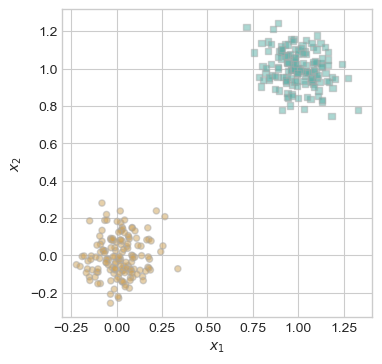

In [257]:
X, y = classification_data(noise = 0.1)
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
plot_data(X, y, ax)

Vanilla Gradient Descent

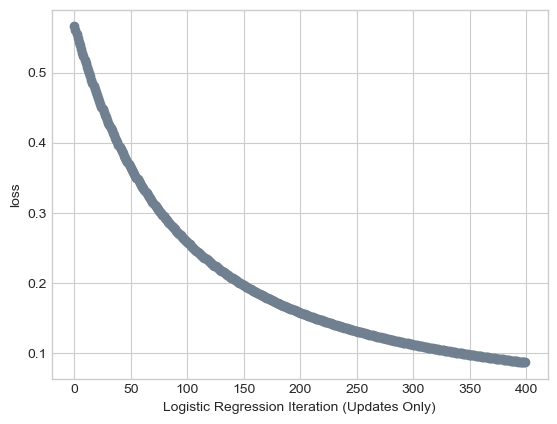

In [258]:
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

loss = 1.0
loss_vec = []



for _ in range(400):
    # add other stuff to e.g. keep track of the loss over time. 
    loss = LR.loss(X, y) 
    loss_vec.append(loss)

    opt.step(X, y, alpha = 0.1, beta = 0)


plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
labs = plt.gca().set(xlabel = "Logistic Regression Iteration (Updates Only)", ylabel = "loss")

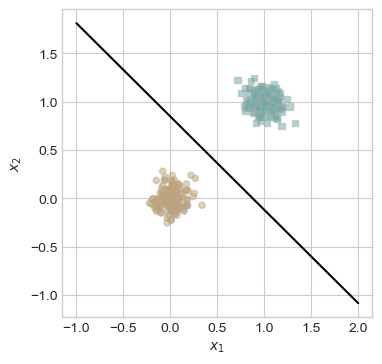

In [259]:

fig, ax = plt.subplots(1, 1, figsize = (4, 4))
plot_data(X, y, ax)
draw_line(LR.w, x_min = -1, x_max = 2, ax = ax, color = "black")


INTERPRET

Benefits ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍of ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍momentum - same data

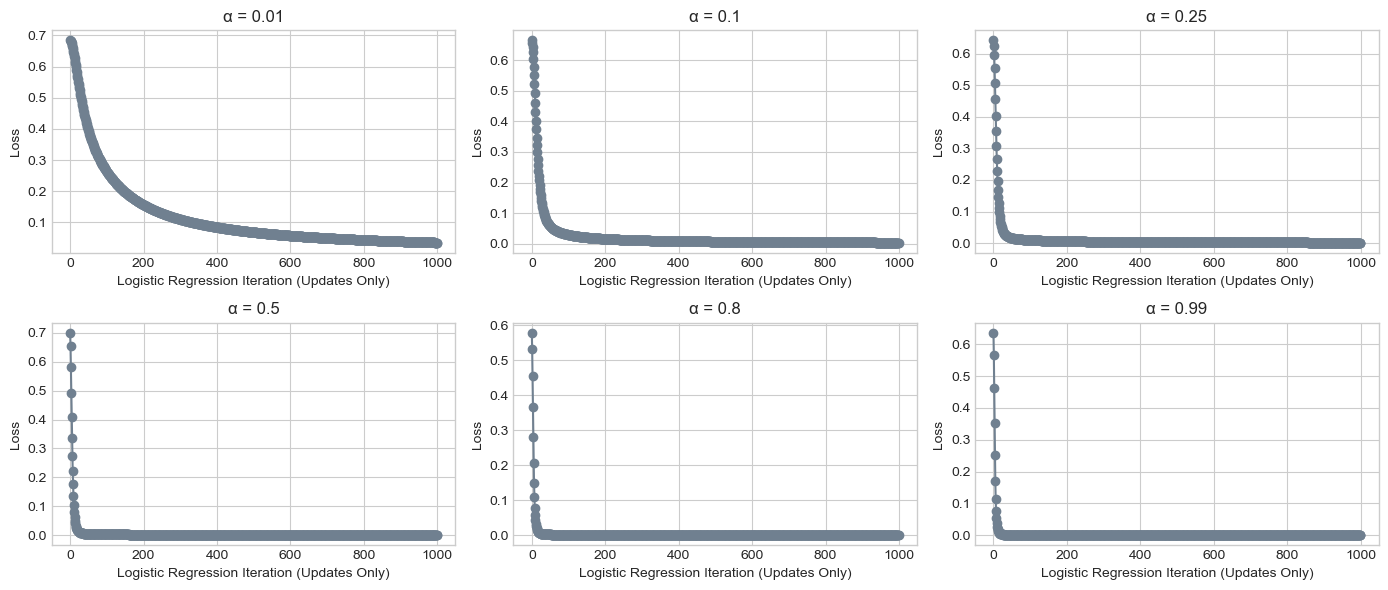

In [260]:
fig, axes = plt.subplots(2, 3, figsize=(14, 6))
alphas = [0.01, 0.1, 0.25, 0.5, .8, .99]

for idx, alpha in enumerate(alphas):
    # ⬇️ Re-initialize model and optimizer each time
    model = LogisticRegression()
    optimizer = GradientDescentOptimizer(model)

    loss_vec = []
    for _ in range(1000):
        loss = model.loss(X, y)
        loss_vec.append(loss.item())
        optimizer.step(X, y, alpha=alpha, beta=0.9)

    ax = axes.flatten()[idx]
    ax.plot(loss_vec, color="slategrey")
    ax.scatter(torch.arange(len(loss_vec)), loss_vec, color="slategrey")
    ax.set_title(f"α = {alpha}")
    ax.set_xlabel("Logistic Regression Iteration (Updates Only)")
    ax.set_ylabel("Loss")
    ax.grid(True)

plt.tight_layout()
plt.show()


COMENTARY!!

In [261]:
# Generate the train and test datasets
X_train, y_train = classification_data(n_points=30, noise=0.7, p_dims=100)
X_test, y_test = classification_data(n_points=30, noise=0.7, p_dims=100)

# Initialize your model and optimizer
model = LogisticRegression()
optimizer = GradientDescentOptimizer(model)



loss = 1

# Train for some iterations
iterations = 1
while True:  
    train_preds = model.predict(X_train)
    train_acc = (train_preds == y_train).float().mean().item()
    print(train_acc)
    if train_acc == 1:
        break
    optimizer.step(X_train, y_train, alpha=1, beta=0.99)
    iterations += 1
print(iterations)

train_preds = model.predict(X_train)

# Evaluate on test data
test_preds = model.predict(X_test)
test_acc = (test_preds == y_test).float().mean().item()

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")


0.8333333134651184
0.8666666746139526
1.0
3
Train Accuracy: 1.00
Test Accuracy: 0.77


INTERPRET

In [262]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
y

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [263]:
# Convert to binary classification: 1 if Setosa, 0 otherwise
y_bin = (y['class'] == 'Iris-setosa').astype(int)
y_bin

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: class, Length: 150, dtype: int64

In [264]:
from sklearn.model_selection import train_test_split
# Step 1: Hold out 20% of total data for testing
X_temp, X_test, y_temp, y_test = train_test_split(X, y_bin, test_size=0.2)

# Step 2: Take 25% of the remaining 80% for validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25)


In [265]:
# Convert everything to torch tensors *before* calling train_model
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_val   = torch.tensor(X_val.values, dtype=torch.float32)
X_test  = torch.tensor(X_test.values, dtype=torch.float32)

y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_val   = torch.tensor(y_val.values, dtype=torch.float32)
y_test  = torch.tensor(y_test.values, dtype=torch.float32)


In [266]:
import matplotlib.pyplot as plt

def train_model(X, y, X_val, y_val, alpha, beta, max_iter=50):
    loss = 1
    model = LogisticRegression()
    _ = model.predict(X)  # will call .score() and initialize weights
    optimizer = GradientDescentOptimizer(model)

    train_losses, val_losses = [], []
    for i in range(max_iter):
        train_losses.append(model.loss(X, y).item())
        val_losses.append(model.loss(X_val, y_val).item())
        optimizer.step(X, y, alpha=alpha, beta=beta)

    return train_losses, val_losses, model


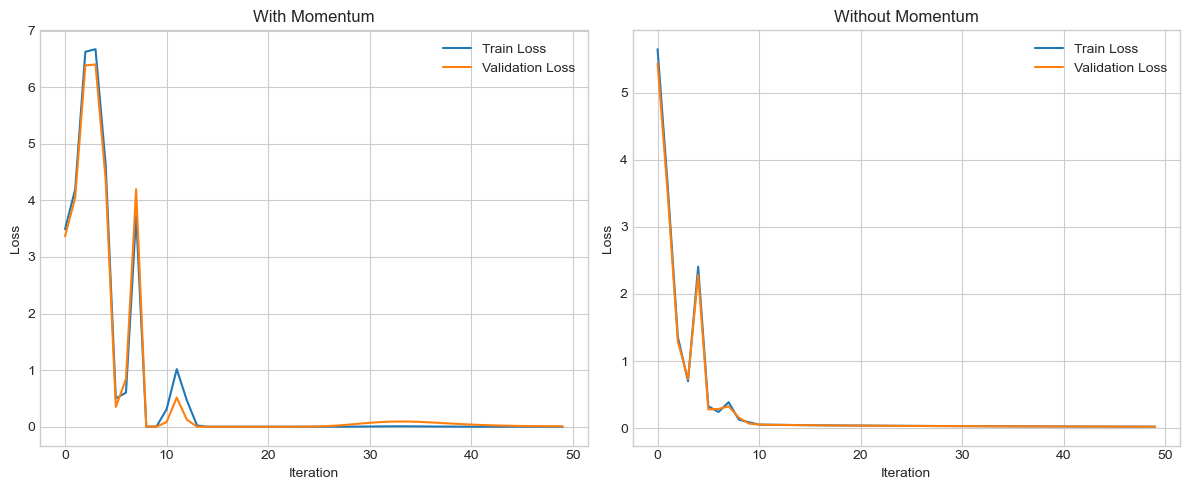

With Momentum — Test Accuracy: 1.00, Test Loss: 0.0000
Without Momentum — Test Accuracy: 1.00, Test Loss: 0.0162


In [267]:

# Train with momentum
train_loss_m, val_loss_m, model_m = train_model(X_train, y_train, X_val, y_val, alpha=0.5, beta=0.9)

# Train without momentum
train_loss_nom, val_loss_nom, model_nom = train_model(X_train, y_train, X_val, y_val, alpha=0.5, beta=0.0)

import matplotlib.pyplot as plt

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Momentum subplot
axes[0].plot(train_loss_m, label="Train Loss")
axes[0].plot(val_loss_m, label="Validation Loss")
axes[0].set_title("With Momentum")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Loss")
axes[0].legend()

# No Momentum subplot
axes[1].plot(train_loss_nom, label="Train Loss")
axes[1].plot(val_loss_nom, label="Validation Loss")
axes[1].set_title("Without Momentum")
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("Loss")
axes[1].legend()

plt.tight_layout()
plt.show()


# Evaluation on test data
def evaluate(model, X, y):
    preds = model.predict(X)
    acc = (preds == y).float().mean().item()
    loss = model.loss(X, y).item()
    return acc, loss

acc_m, loss_m = evaluate(model_m, X_test, y_test)
acc_nom, loss_nom = evaluate(model_nom, X_test, y_test)

print(f"With Momentum — Test Accuracy: {acc_m:.2f}, Test Loss: {loss_m:.4f}")
print(f"Without Momentum — Test Accuracy: {acc_nom:.2f}, Test Loss: {loss_nom:.4f}")


# Conclusion

In conclusion, this blog post explored the perceptron algorithm and its ability to find linear decision boundaries through iterative updates based on classification errors. We implemented the core update rule and visualized how the algorithm learns over time across different settings and datasets. In the latter part of the project, we extended the perceptron to support minibatch updates, which allowed us to average updates across multiple examples, improving stability and enabling convergence even in the presence of noise. These experiments highlighted both the strengths and limitations of the perceptron and provided a foundation for understanding more advanced linear classifiers.